# Excel Import

In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install eunjeon
# !pip install wordcloud

In [2]:
import csv
from dataclasses import dataclass, field, asdict, astuple
from typing import List
from collections import namedtuple
from functools import reduce
from functools import partial
import math
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import random
import os

# import smtplib
# from email.mime.multipart import MIMEMultipart
# from email.mime.text import MIMEText

c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#################################Module For Functional Programing#############################################
curry = lambda f: lambda a,*args: f(a, *args) if (len(args)) else lambda *args: f(a, *args)

filter = curry(filter)
map = curry(map)

def _take(length, iter):
    res = []
    for a in iter:
        res.append(a)
        if len(res) == length:
            return res
        
take = curry(_take)
reduce = curry(reduce)

go = lambda *args: reduce(lambda a,f: f(a), args) ## 함수도 축약 가능 ##
##############################################################################################################

In [4]:
def importCSV(_path):
    with open(_path,'r', encoding='UTF8') as f:
        reader  = csv.reader(f) # csv의 행별로 읽어옴
        res = [x for x in reader]
        
    return res

def exportCSV(_filename, _datas):
    f = open(_filename, 'w', newline='') # 자동줄바꿈 방지 header 이후 첫행 빈행 생성 방지
    csv_writer = csv.writer(f)
    
    for x in _datas:
        csv_writer.writerow(x)
    f.close()

In [5]:
input_path = '20231215_all_data_최종_메일송부용_사번_당첨자포함.csv'

In [6]:
allDatas = importCSV(input_path)
allDatas

[['\ufeff[NLB] 협업 감사 메시지 EVENT',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  'P1B1',
  'P2B4',
  '',
  '',
  '',
  'P2B5',
  'P2B6',
  'P2B8',
  '',
  '',
  'P2B9',
  'P2B10',
  'P2B11',
  '글자수',
  '글자수 순위',
  '픽',
  '',
  '',
  ''],
 ['응답자ID',
  '답변 확인 고유번호',
  '시작일시',
  '종료일시',
  '어떤 마음을 전달해드릴까요? 카드를 선택하세요.',
  '본인의 성명과 직급을 작성해주세요.',
  '발신자 이름',
  '발신자 사번',
  '',
  '현재 근무지를 입력해주세요.',
  '현재 소속 팀과 근무지를 입력해주세요.',
  '수신인의 성명과 직급을 작성해주세요.',
  '수신자 이름',
  '수신자 사번',
  '수신인의 현재 근무지를 입력해주세요.',
  '수신인이 속한 팀과 근무지를 입력해주세요.',
  '전달하고 싶은 메시지 (고마워요 / 힘내세요 / 수고했어요)',
  '글자수',
  '글자수 순위',
  '픽',
  '',
  '',
  ''],
 ['',
  '',
  '',
  '',
  '응답',
  '',
  '',
  '',
  '',
  '응답',
  '',
  '',
  '',
  '',
  '응답',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
 

In [7]:
headers_origin = allDatas[3]
list(enumerate(headers_origin))

[(0, '응답자ID'),
 (1, '답변 확인 고유번호'),
 (2, '시작일시'),
 (3, '종료일시'),
 (4, '어떤 마음을 전달해드릴까요? 카드를 선택하세요.'),
 (5, '본인의 성명과 직급을 작성해주세요.'),
 (6, '발신자 이름'),
 (7, '발신자 사번'),
 (8, ''),
 (9, '현재 근무지를 입력해주세요.'),
 (10, '현재 소속 팀과 근무지를 입력해주세요.'),
 (11, '수신인의 성명과 직급을 작성해주세요.'),
 (12, '수신자 이름'),
 (13, '수신자 사번'),
 (14, '수신인의 현재 근무지를 입력해주세요.'),
 (15, '수신인이 속한 팀과 근무지를 입력해주세요.'),
 (16, '전달하고 싶은 메시지 (고마워요 / 힘내세요 / 수고했어요)'),
 (17, '글자수'),
 (18, '글자수 순위'),
 (19, '픽'),
 (20, ''),
 (21, ''),
 (22, '')]

In [8]:
keyInform = [
    [0, 'ID'],
    [2, 'start'],
    [4, 'message_type'],
    [5, 'sender_name_position'],
    [6, 'sender_name'],
    [7, 'sender_companyID'],
    [9, 'sender_work_place'],
    [10,'sender_department'],
    [11,'receiver_name_position'],
    [12,'receiver_name'],
    [13,'receiver_companyID'],
    [14,'receiver_work_place'],
    [15,'receiver_department'],
    [16,'message_content'],
]

In [9]:
allDatas_net = allDatas[5:]
allDatas_net

[['8',
  '140-88-89538',
  '45261.55903',
  '45261.56042',
  '[IMAGE] 힘내세요',
  '김규태 매니저',
  '김규태',
  'gtkim',
  '',
  '본사',
  '신성장전략팀',
  '김영도 매니저',
  '김영도',
  'zerodegree',
  '해외현장',
  'EGAT 현장',
  '오랜 기간 타지에서 정말 고생이 많아 제디ㅠㅠㅠㅠ 좀만 더 힘내고 건강하게 복귀해서 방탈출하러 가쟈~~~!!',
  '60',
  '258',
  '',
  '미라클모닝1',
  '',
  ''],
 ['10',
  '327-09-77452',
  '45264.78542',
  '45264.78958',
  '[IMAGE] 힘내세요',
  '김성현 책임매니저',
  '김성현',
  'shgaga',
  '',
  '해외현장',
  '플랜트수행2팀 / 태국 TUCF 현장',
  '위형권 매니저',
  '위형권',
  'winwin',
  '국내현장',
  '플랜트수행2팀 / 당진 LECO 현장',
  '형권아 올해도 고생 많았다!!\n진급과 함께 따뜻한 연말이 되었음 좋겠다🙏',
  '41',
  '383',
  '',
  '미라클모닝2',
  '',
  ''],
 ['13',
  '536-64-59947',
  '45264.87292',
  '45264.87708',
  '[IMAGE] 고마워요',
  '정범진 대리',
  '정범진',
  'jbj',
  '',
  '국내현장',
  '자산관리1팀 / 강남대로',
  '권기훈 대리',
  '권기훈',
  'gihun.kwon',
  '국내현장',
  '자산관리4팀 / 현대모터스튜디오 고양',
  '권대리님~\n1팀으로 오고 나서 얼굴보기가 힘든데 잘 지내고 계시죠? ㅎㅎㅎ\n고양에서 여러모로 고생많았고 특히 본인 업무 뿐만 아니라 내 업무까지 도와주느라 고생많으셨는데 언젠가 빛을 볼거라 생각해요!! 응원합니다 ㅎㅎㅎ\n오랜시간 함께 했는데 소속이 바뀌고 나니 

In [10]:
def make_messageDict(oneRow, keyInform):
    keys = list(map(lambda x: x[1], keyInform))
    vals = list(map(lambda x: oneRow[x[0]], keyInform))
    
    return dict(zip(keys,vals))

make_messageDict(allDatas_net[0], keyInform)

{'ID': '8',
 'start': '45261.55903',
 'message_type': '[IMAGE] 힘내세요',
 'sender_name_position': '김규태 매니저',
 'sender_name': '김규태',
 'sender_companyID': 'gtkim',
 'sender_work_place': '본사',
 'sender_department': '신성장전략팀',
 'receiver_name_position': '김영도 매니저',
 'receiver_name': '김영도',
 'receiver_companyID': 'zerodegree',
 'receiver_work_place': '해외현장',
 'receiver_department': 'EGAT 현장',
 'message_content': '오랜 기간 타지에서 정말 고생이 많아 제디ㅠㅠㅠㅠ 좀만 더 힘내고 건강하게 복귀해서 방탈출하러 가쟈~~~!!'}

In [11]:
allMsgDicts = list(map(lambda x: make_messageDict(x, keyInform), allDatas_net))
len(allMsgDicts) ,allMsgDicts

(513,
 [{'ID': '8',
   'start': '45261.55903',
   'message_type': '[IMAGE] 힘내세요',
   'sender_name_position': '김규태 매니저',
   'sender_name': '김규태',
   'sender_companyID': 'gtkim',
   'sender_work_place': '본사',
   'sender_department': '신성장전략팀',
   'receiver_name_position': '김영도 매니저',
   'receiver_name': '김영도',
   'receiver_companyID': 'zerodegree',
   'receiver_work_place': '해외현장',
   'receiver_department': 'EGAT 현장',
   'message_content': '오랜 기간 타지에서 정말 고생이 많아 제디ㅠㅠㅠㅠ 좀만 더 힘내고 건강하게 복귀해서 방탈출하러 가쟈~~~!!'},
  {'ID': '10',
   'start': '45264.78542',
   'message_type': '[IMAGE] 힘내세요',
   'sender_name_position': '김성현 책임매니저',
   'sender_name': '김성현',
   'sender_companyID': 'shgaga',
   'sender_work_place': '해외현장',
   'sender_department': '플랜트수행2팀 / 태국 TUCF 현장',
   'receiver_name_position': '위형권 매니저',
   'receiver_name': '위형권',
   'receiver_companyID': 'winwin',
   'receiver_work_place': '국내현장',
   'receiver_department': '플랜트수행2팀 / 당진 LECO 현장',
   'message_content': '형권아 올해도 고생 많았다!!\n진급과 함께 따뜻한 연말

In [12]:
# !pip install eunjeon

In [13]:
from eunjeon import Mecab

In [14]:
locations = set(list(map(lambda x: x['sender_work_place'], allMsgDicts)))
locations

{'국내현장', '본사', '서울사무소', '해외현장'}

In [15]:
thnks = lambda _list: go\
(_list,
 filter(lambda x: '고마워요' in x['message_type']),
 list,
 len,
)

cheers = lambda _list: go\
(_list,
 filter(lambda x: '힘내세요' in x['message_type']),
 list,
 len,
)

goodjob = lambda _list: go\
(_list,
 filter(lambda x: '수고했어요' in x['message_type']),
 list,
 len,
)

type_res = {
    '고마워요': thnks(allMsgDicts), 
    '힘내세요': cheers(allMsgDicts), 
    '수고했어요': goodjob(allMsgDicts),
}

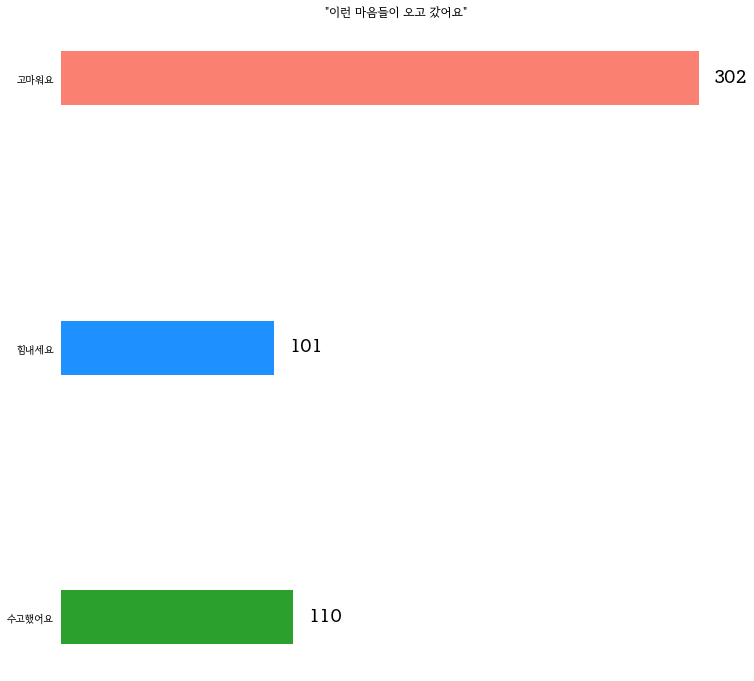

In [16]:
import numpy as np
font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/RIDIBatang_0.otf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
# 출처: https://giveme-happyending.tistory.com/168 [소연의_개발일지:티스토리]

y_pos = np.arange(len(type_res))
plt.figure(figsize=(12,12))
# plt.barh(y_pos, res.values())
plt.title('"이런 마음들이 오고 갔어요"')
plt.yticks(y_pos, type_res.keys())
plt.gca().invert_yaxis()
bar = plt.barh(y_pos, type_res.values(), height=0.2, color=['salmon', 'dodgerblue', 'C2'])

# 숫자 넣는 부분
for rect in bar:
    width = rect.get_width()
    plt.text(width+15, rect.get_y() + rect.get_height()/1.5, '%1.f' % width, ha='center', va='bottom', size = 20)

plt.rc('font', family=font_name, size=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.xaxis.set_ticklabels([])
plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False)

plt.show()


In [17]:
def from_to_analysis(f,t,_list):
    resf = lambda _list: go\
    (_list,
     filter(lambda x: x['sender_work_place']==f),
     filter(lambda x: x['receiver_work_place']==t),
     list,
     len,
    )
    return resf(_list)


In [18]:
res = {}
for f in locations:
    for t in locations:
        res[f'{f} to {t}  '] = from_to_analysis(f,t,allMsgDicts)
        
res

{'해외현장 to 해외현장  ': 19,
 '해외현장 to 본사  ': 12,
 '해외현장 to 서울사무소  ': 1,
 '해외현장 to 국내현장  ': 5,
 '본사 to 해외현장  ': 47,
 '본사 to 본사  ': 270,
 '본사 to 서울사무소  ': 25,
 '본사 to 국내현장  ': 10,
 '서울사무소 to 해외현장  ': 3,
 '서울사무소 to 본사  ': 11,
 '서울사무소 to 서울사무소  ': 5,
 '서울사무소 to 국내현장  ': 0,
 '국내현장 to 해외현장  ': 3,
 '국내현장 to 본사  ': 26,
 '국내현장 to 서울사무소  ': 0,
 '국내현장 to 국내현장  ': 76}

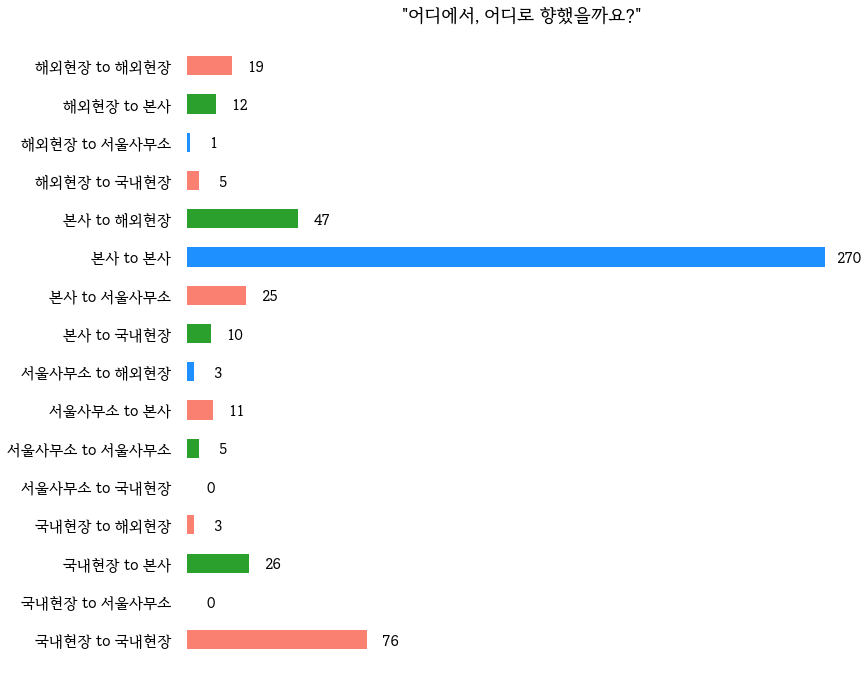

In [29]:
import numpy as np
font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/ridibatang.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
# 출처: https://giveme-happyending.tistory.com/168 [소연의_개발일지:티스토리]
colors = ['salmon','C2','dodgerblue']

y_pos = np.arange(len(res))
plt.figure(figsize=(12,12))
# plt.barh(y_pos, res.values())
plt.title('"어디에서, 어디로 향했을까요?"')
plt.yticks(y_pos, res.keys())
plt.gca().invert_yaxis()
bar = plt.barh(y_pos, res.values(), height=0.5, color=colors)

# 숫자 넣는 부분
for rect in bar:
    width = rect.get_width()
    plt.text(width+10, rect.get_y() + rect.get_height(), '%1.f' % width, ha='center', va='bottom', size = 15)

plt.rc('font', family=font_name, size=15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.xaxis.set_ticklabels([])
plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False)

plt.show()

In [20]:
from eunjeon import Mecab
stop_words = "전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 한 년 해 저 동안 책임 앞 짜증 매니저 박민정 대리 과장 팀장 부장 소장 행 텐데 옆"
stop_words = stop_words.split()

In [21]:
tagger = Mecab()

nouns = []

for i in allMsgDicts:
    msgContents = i['message_content']
    for noun in tagger.nouns(msgContents):
        if noun not in stop_words:
            nouns.append(noun)

nouns

['기간',
 '타지',
 '고생',
 '제',
 '디',
 '건강',
 '복귀',
 '방',
 '탈출',
 '형',
 '올해',
 '고생',
 '진급',
 '연말',
 '권',
 '팀',
 '얼굴',
 '고양',
 '고생',
 '본인',
 '업무',
 '업무',
 '고생',
 '빛',
 '생각',
 '응원',
 '시간',
 '소속',
 '얼굴',
 '월',
 '그때',
 '그동안',
 '회포',
 '고생',
 '연락',
 '응원',
 '고민',
 '의논',
 '동료',
 '내년',
 '목표',
 '달성',
 '응원',
 '이영희',
 '입사',
 '처음',
 '현재',
 '믿음',
 '마음',
 '주심',
 '평생',
 '감사',
 '건강',
 '가정',
 '행복',
 '축복',
 '기원',
 '감사',
 '감사',
 '크리스마스',
 '분위기',
 '준비',
 '민지',
 '덕분',
 '비실',
 '내색',
 '본부',
 '곳',
 '사람',
 '도움',
 '때문',
 '생각',
 '도움',
 '민지',
 '생각',
 '주변',
 '사람',
 '민지',
 '무엇',
 '너',
 '스스로',
 '최우선',
 '내년',
 '행복',
 '수고',
 '감사',
 '김상호',
 '현장',
 '근무',
 '감자',
 '신경',
 '고생',
 '다음',
 '현장',
 '현장',
 '기간',
 '몸',
 '마무리',
 '감사',
 '당첨',
 '수고',
 '현장',
 '부임',
 '성공',
 '프로젝트',
 '불철주야',
 '노력',
 '류',
 '수고',
 '다년간',
 '프로젝트',
 '노력',
 '모습',
 '멋',
 '화이팅',
 '파트',
 '장',
 '건강',
 '탈',
 '응원',
 '감사',
 '내년',
 '행복',
 '감사',
 '장창호',
 '안녕',
 '입사',
 '초반',
 '감사',
 '엑셀',
 '수식',
 '덕분',
 '도움',
 '회사',
 '인수인계',
 '업무',
 '영광',
 '요즘',
 '독감',
 '유행',
 '데',
 '건강',
 

In [22]:
from wordcloud import WordCloud
# from konlpy.tag import Twitter
from collections import Counter

In [23]:
os.path

<module 'ntpath' from 'c:\\Users\\HEC\\AppData\\Local\\Programs\\Python\\Python39\\lib\\ntpath.py'>

In [24]:
# !pip install --upgrade pip

# !pip install --upgrade Pillow

{'감사': 381, '내년': 134, '건강': 124, '도움': 120, '행복': 117, '수고': 116, '고생': 112, '부탁': 93, '연말': 81, '현장': 76, '업무': 75, '모습': 64, '와중': 61, '새해': 55, '기원': 50, '팀': 48, '마무리': 45, '생각': 42, '덕분': 39, '올해': 38, '가정': 37, '웃음': 34, '은혜': 34, '진심': 28, '마음': 27, '회사': 25, '우리': 25, '응원': 20, '적응': 20, '때문': 19, '시간': 17, '입사': 17, '현업': 17, '베': 17, '힘': 17, '안녕': 16, '해외': 16, '출장': 16, '가족': 15, '간': 15, '생활': 14, '복': 14, '근무': 13, '노력': 13, '화이팅': 13, '월': 12, '연락': 12, '말씀': 12, '지원': 12, '신경': 11, '프로젝트': 11, '사원': 11, '인사': 11, '자리': 11, '수행': 11, '분위기': 10, '사람': 10, '파트': 10, '신입': 10, '기회': 10, '해결': 10, '제': 9, '곳': 9, '장': 9, '본사': 9, '친절': 9, '긍정': 9, '적극': 9, '해복': 9, '기간': 8, '형': 8, '그동안': 8, '협업': 8, '직원': 8, '문제': 8, '센터': 8, '복귀': 7, '처음': 7, '사랑': 7, '조언': 7, '어려움': 7, '진행': 7, '저희': 7, '얼굴': 6, '다음': 6, '개인': 6, '역할': 6, '부서': 6, '날': 6, '차': 6, '순간': 6, '처리': 6, '작년': 6, '선배': 6, '안전': 6, '질문': 6, '협조': 6, '설계': 6, '건축': 6, '조심': 6}


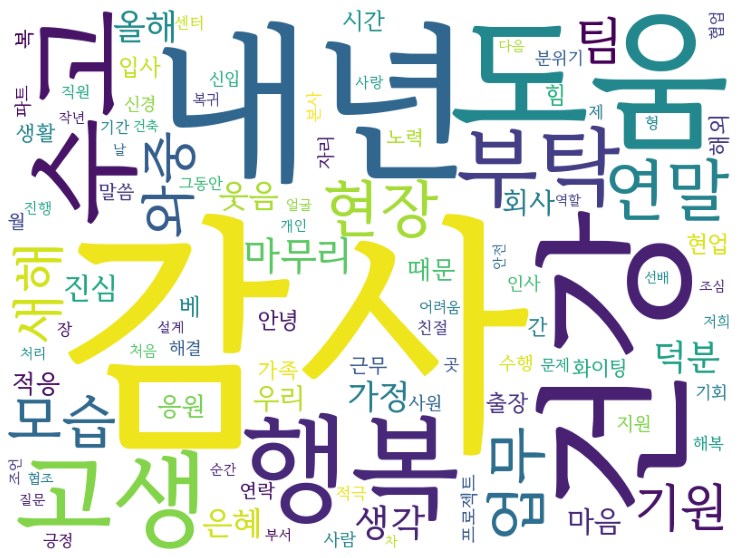

In [25]:
word_count = 100

counts = Counter(nouns)
tags = counts.most_common(word_count)
print(dict(tags))
wc = WordCloud(font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/ridibatang.ttf', background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(40,10))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [26]:
# from collections import Counter
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(10))
top_nouns

{'감사': 381,
 '내년': 134,
 '건강': 124,
 '도움': 120,
 '행복': 117,
 '수고': 116,
 '고생': 112,
 '부탁': 93,
 '연말': 81,
 '현장': 76}

c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HEC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWa

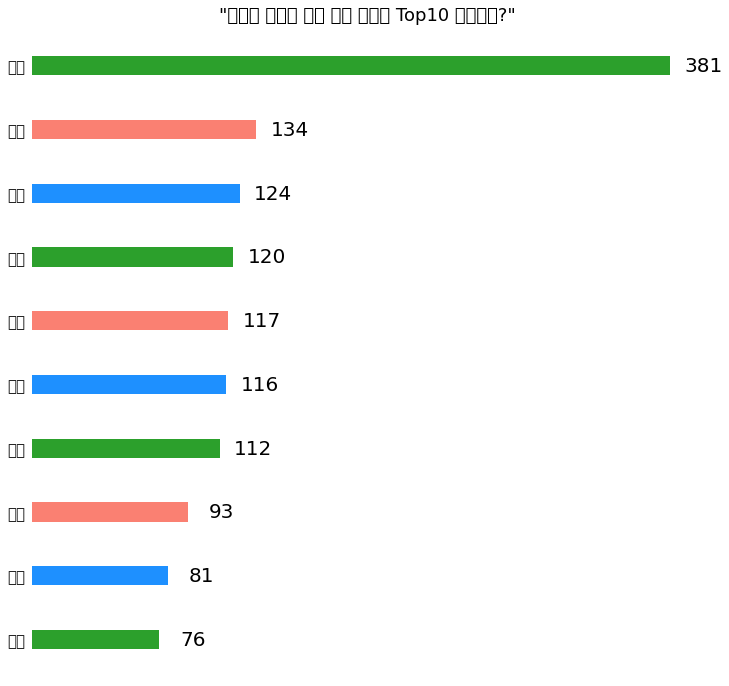

In [27]:
import numpy as np
# font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/Eulyoo1945-SemiBold.otf'
font_path = 'C:/Users/HEC/AppData/Local/Microsoft/Windows/Fonts/RIDIBatang_0.otf'
font_name = fm.FontProperties(fname=font_path).get_name()
# 출처: https://giveme-happyending.tistory.com/168 [소연의_개발일지:티스토리]
colors = ['C2','salmon','dodgerblue', ]

y_pos = np.arange(len(top_nouns))
plt.figure(figsize=(12,12))
bar = plt.barh(y_pos, top_nouns.values(), height=0.3, color=colors)
plt.title('"마음을 정하기 위해 자주 사용된 Top10 키워드는?"')
plt.yticks(y_pos, top_nouns.keys())
plt.gca().invert_yaxis()

# 숫자 넣는 부분
for rect in bar:
    width = rect.get_width()
    plt.text(width+20, rect.get_y() + rect.get_height(), '%1.f' % width, ha='center', va='bottom', size = 20)
    
plt.rc('font', family=font_name, size=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().axes.xaxis.set_ticklabels([])
plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False)

plt.show()
